# Machine Learning Midterm, Aug Semester, 2020

In this exam, you will demonstrate your understanding of the material from the lectures, tutorials, and problem sets.

Exam submission is on Gradescope. Before you begin the exam, make sure you have created an account at [http://gradescope.com](http://gradescope.com). Then you have to sign up for AT82.03 in Aug 2020. The course signup code is MY3YPW .

For each question, insert your answer directly in this sheet. When complete, export the sheet as a PDF and upload to Gradescope. If you are using puffer.cs.ait.ac.th, in JupyterLab, click on "File" then "Export Notebook As" then select PDF. If you are running Jupyter on your own machine, you may need to install the `nbconvert` package with pip or conda.

Note that you have **2.5 hours** to do the exam. Also note that there are short answer questions that you may be able to answer faster than the coding questions. You might consider answering those questions first to get as much credit as possible!

## Question 1 (10 points)

We have seen that regression problems and binary classification problems have seemingly different cost functions. For regression, we normally use the cost function
$$J(\theta) = \sum_{i=1}^m \left( h_\theta(\mathbf{x}^{(i)}) - y^{(i)} \right)^2,$$
whereas for binary classifiation, we normally use the cost function
$$J(\theta) = \sum_{i=1}^m \left( y^{(i)} \log h_\theta(\mathbf{x}^{(i)}) + (1-y^{(i)})\log(1 - h_\theta(\mathbf{x}^{(i)})) \right). $$

Briefly explain (in English) how these two different cost functions are derived from the same idea or principle.

**Both cost functions can be derived from the principle of maximum likelihood. For regression, the negative log likelihood of $\theta$ under the assumption that $y \sim {\cal N}(\theta^\top \mathbf{x}, \sigma^2)$ turns out to be the least squares cost function, and the negative log likelihood of $\theta$ under the assumption that $y^{(i)} \sim \text{Bernoulli}(p)$ with $p = \frac{1}{1+e^{-\theta^\top \mathbf{x}^{(i)}}}$ gives the cross entropy
loss function for binary classification.**

## Question 2 (20 points)

Generate a sample of 200 points from a 2D Gaussian with mean $\mu_1 = \begin{bmatrix} 3 \\ 3 \end{bmatrix}$ and covariance $\Sigma_1 = \begin{bmatrix} 4 & 0 \\ 0 & 4 \end{bmatrix}$

Generate a second sample of 200 points from a 2D Gaussian with mean $\mu_2 = \begin{bmatrix} 5 \\ 5 \end{bmatrix}$ and covariance $\Sigma_2 = \begin{bmatrix} 4 & 0 \\ 0 & 4 \end{bmatrix}$.

Assuming the first set of points is class 0 and the second set of points is class 1, split the dataset into 80% training and 20% testing, and plot the
training set and test set in separate plots with different colors for each class below.


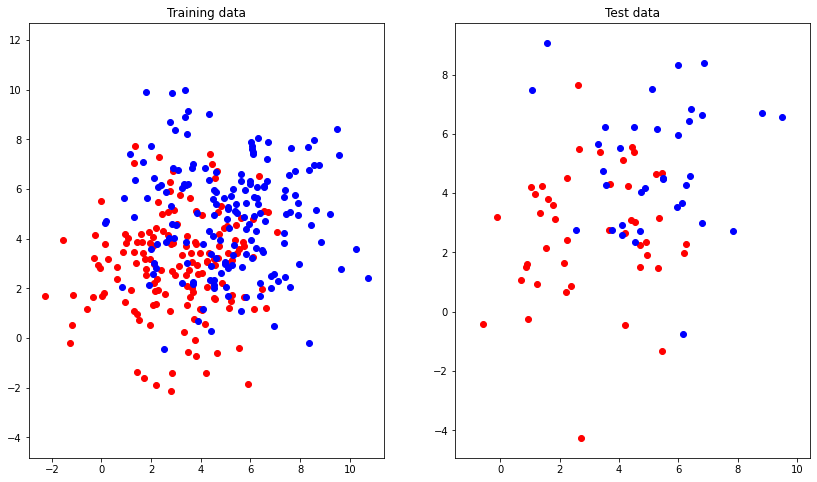

In [88]:
# Place code to generate the data and plot them here.

import numpy as np
import matplotlib.pyplot as plt

def generate_data(mu1, Sigma1, mu2, Sigma2):
    X1 = np.random.multivariate_normal(mu1, Sigma, 200)
    y1 = np.zeros((200,1))
    X2 = np.random.multivariate_normal(mu2, Sigma, 200)
    y2 = np.ones((200,1))
    X = np.concatenate((X1, X2), 0)
    y = np.concatenate((y1, y2), 0)
    idx = np.arange(0, 400)
    np.random.shuffle(idx)
    train_idx = idx[0:320]
    test_idx = idx[320:]
    X_train = X[train_idx,:]
    X_test = X[test_idx,:]
    y_train = y[train_idx,:]
    y_test = y[test_idx,:]
    return X_train, X_test, y_train, y_test

mu1 = [3, 3]
Sigma = [[4, 0], [0, 4]]
mu2 = [5, 5]
X_train, X_test, y_train, y_test = generate_data(mu1, Sigma, mu2, Sigma)

def plot_data(X, y, title):
    X_0 = X[(y==0).flat]
    X_1 = X[(y==1).flat]
    plt.plot(X_0[:,0], X_0[:,1], 'ro')
    plt.plot(X_1[:,0], X_1[:,1], 'bo')
    plt.title(title)
    plt.axis('equal')
    
plt.rcParams["figure.figsize"] = (14, 8)
plt.subplot(1, 2, 1)
plot_data(X_train, y_train, 'Training data')
plt.subplot(1, 2, 2)
plot_data(X_test, y_test, 'Test data')


## Question 3 (20 points)

Build a logistic regression model for the training set in Question 2. Plot the test set with correctly and incorrectly classified points using different symbols, and show the classification boundary in a plot below. 

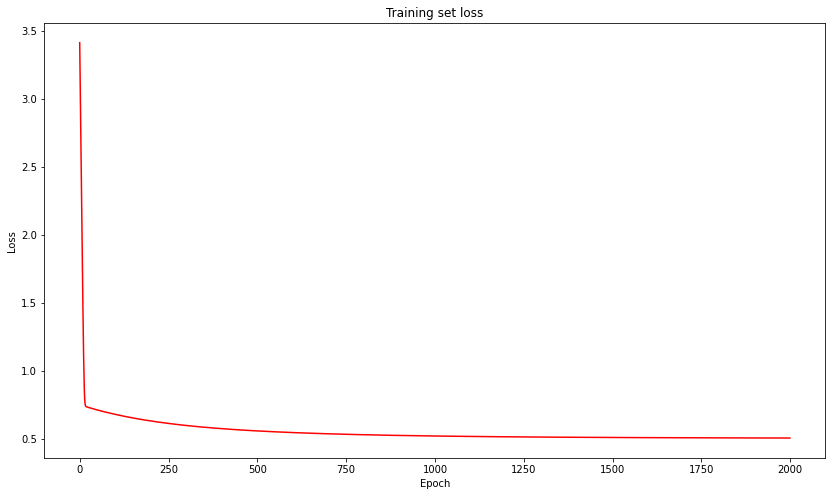

In [89]:
# Place code to train the logistic regression model and plot the results here.

def sigmoid(z):   
    return 1 / (1 + np.exp(-z))

def h(X, theta):
    return sigmoid(X @ theta)

def grad_j(X, y, y_pred):
    return X.T @ (y - y_pred) / X.shape[0]
    
def j(theta, X, y):    
    y_pred = h(X, theta)
    error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
    cost = sum(error) / X.shape[0]
    grad = grad_j(X, y, y_pred)
    return cost[0], grad

def train(X, y, theta_initial, alpha, num_iters):
    theta = theta_initial
    j_history = []
    for i in range(num_iters):
        cost, grad = j(theta, X, y)
        #print(cost)
        theta = theta + alpha * grad
        j_history.append(cost)
    return theta, j_history

X_train_aug = np.concatenate((np.ones((320,1)), X_train), 1)
theta_initial = np.ones((3,1))
theta_final, j_history = train(X_train_aug, y_train, theta_initial, 0.05, 2000)

plt.plot(j_history, 'r-')
plt.title('Training set loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


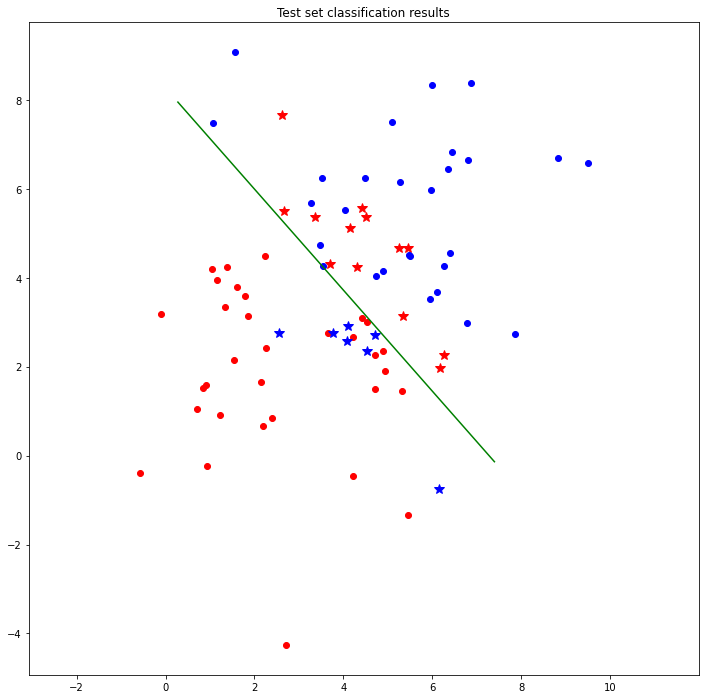

In [90]:
def boundary_points(X, theta):
    v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
    v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
    dist_ortho = theta[0,0] / v_ortho_length
    v_orthogonal = v_orthogonal / v_ortho_length
    v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
    projections = X @ v_parallel
    proj_1 = min(projections)
    proj_2 = max(projections)
    point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
    point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
    return point_1, point_2

def plot_data_with_correctness(X, y, yhat, theta, title):
    X_0_corr = X[np.logical_and(y == 0, yhat < 0.5).flat]
    X_0_incorr = X[np.logical_and(y == 0, yhat >= 0.5).flat]
    X_1_corr = X[np.logical_and(y == 1, yhat >= 0.5).flat]
    X_1_incorr = X[np.logical_and(y == 1, yhat < 0.5).flat]
    plt.rcParams["figure.figsize"] = (12, 12)
    plt.plot(X_0_corr[:,0], X_0_corr[:,1], 'ro')
    plt.plot(X_0_incorr[:,0], X_0_incorr[:,1], 'r*', markersize=10)
    plt.plot(X_1_corr[:,0], X_1_corr[:,1], 'bo')
    plt.plot(X_1_incorr[:,0], X_1_incorr[:,1], 'b*', markersize=10)
    point_1, point_2 = boundary_points(X, theta)
    plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'g-')
    plt.title(title)
    plt.axis('equal')

X_test_aug = np.concatenate((np.ones((80,1)), X_test), 1)
yhat_test = h(X_test_aug, theta_final)

plot_data_with_correctness(X_test, y_test, yhat_test, theta_final, 'Test set classification results')


## Question 4 (10 points)

Explain why it is not possible to train a SVM using the techniques we've studied so far in class to classify the data from Question 2. Give a value for $\mu_2$ in Question 2 keeping the other values constant that would make it very likely that the training could be classified using the SVM techniques we studied so far in class.

**For the techniques we've studied so far for the SVM to work, the training data need to be linearly separable. That is clearly not true from the plot in Question 2. To make the data linearly separable, we'd need a $\mu_2$ much farther from $\mu_1$ than what is given. If $\mu_2 = \begin{bmatrix} 12 & 12 \end{bmatrix}^\top$, the data are linearly separable almost always:**

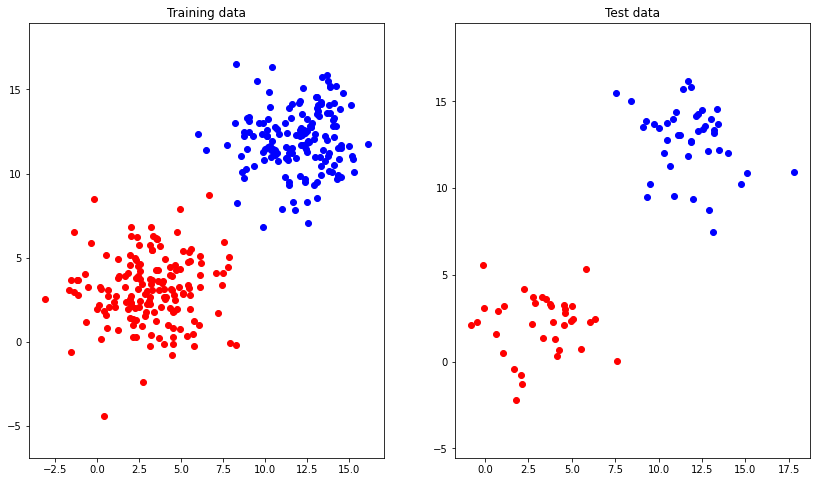

In [93]:
mu1 = [3, 3]
Sigma = [[4, 0], [0, 4]]
mu2 = [12, 12]
X_train, X_test, y_train, y_test = generate_data(mu1, Sigma, mu2, Sigma)

plt.rcParams["figure.figsize"] = (14, 8)
plt.subplot(1, 2, 1)
plot_data(X_train, y_train, 'Training data')
plt.subplot(1, 2, 2)
plot_data(X_test, y_test, 'Test data')


## Question 5 (10 points)

Suppose you are building a linear SVM in $\mathbb{R}^2$. The two classes are represented as 'X's and 'O's in the diagram below.

<img src="http://www.cs.ait.ac.th/~mdailey/class/ml/q2.jpg" width="400"></img>

If the training data consisted only of the four examples A, B, C, and D in the diagram above, which would be the support
vectors?

**Points A, B, and D would be the support vectors.**

## Question 6 (10 points)

In Question 5 (the linear SVM),
if you were told that Lagrange multipliers $\alpha_A = 1.0$ and $\alpha_D = 2.0$, what would $\alpha_B$ and $\alpha_C$ be?

**Clearly $\alpha_C = 0$, since it is not a support vector. Since $$\sum_{i=1}^m \alpha_i y^{(i)} = 0,$$ we need $\alpha_B=1$.**

## Question 7 (10 points)

Suppose the optimal linear SVM for Question 5 had $\mathbf{w} = \begin{bmatrix} 1 & 1 \end{bmatrix}^\top$ and $b = -2$.
Find the geometric margin $\gamma^{(i)}$ for $\mathbf{x}^{(i)} = \begin{bmatrix} 2 & 5 \end{bmatrix}^\top$ and $y^{(i)} = 1$. 

**The geometric margin for example $i$ is $$\gamma^{(i)} = y^{(i)} \left( \frac{\mathbf{w}^\top \mathbf{x}^{(i)}}{\| \mathbf{w} \|} + \frac{b}{\| \mathbf{w} \|} \right),$$ which according to the code below is 3.536.**

In [97]:
w = np.array([[1],[1]])
x = np.array([[2],[5]])
b = -2
norm_w = np.sqrt(w.T @ w)
gamma = w.T @ x / norm_w + b / norm_w
print('Gamma:', gamma[0,0])

Gamma: 3.5355339059327378


## Question 8 (10 points)

Consider the SVM kernel $K(\mathbf{x},\mathbf{z}) = (\mathbf{x}^\top \mathbf{z})^2$. Explain the similarities and differences between a SVM with this kernel and a logistic regression using a quadratic polynomial transformation (an ordinary logistic regression preceeded by a transformation of the input vector. If they are exactly the same, prove it. If not, clearly explain how they are different.

**They are similar but not exactly the same. In the lecture notes, it's proven that $K(\mathbf{x},\mathbf{z}) = (\mathbf{x}^\top \mathbf{z})^2$ corresponds to a transformation $$\phi = \begin{bmatrix} x_1 x_1 & x_1 x_2 & \ldots & x_2 x_1 & x_2 x_2 & \ldots & x_n x_n \end{bmatrix},$$ which is indeed a polynomial transformation with degree 2. The SVM doesn't need a constant input like logistic regression does, because the $b$ parameter is separate from $\mathbf{w}$. However, the transformation above does leaves out the linear terms, which could be important. Also, SVMs find maximum margin linear classifiers in feature space rather than the maximum likelihood linear classifiers. This could affect the final decision boundary, depending on the training data distribution.**